In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='serif', size=80)
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = 16, 8

In [2]:
from sklearn import linear_model, ensemble
import ROOT
from root_numpy import root2array, tree2array, fill_hist

Welcome to JupyROOT 6.07/07


In [3]:
rfile = ROOT.TFile('/Disk/ds-sopa-group/PPE/titus/ts-WChRecoSandBox/scripts/editing_ene/outputs/nu_numu_1000_1039_CCQE_12in_energy_studies_recoquant_tree.root')
intree = rfile.Get('nu_eneNEW')

In [4]:
E_threshold = 100
arr_lo_E = tree2array(intree,selection='trueKE<'+str(E_threshold))
arr_hi_E = tree2array(intree,selection='trueKE>'+str(E_threshold))

/cvmfs/sft.cern.ch/lcg/releases/LCG_85swan2/root_numpy/4.5.1/x86_64-slc6-gcc49-opt/lib/python2.7/site-packages/root_numpy-4.5.1-py2.7-linux-x86_64.egg/root_numpy/_tree.py:372: RuntimeWarning: ignoring duplicate branch named 'i'
  cache_size)
/cvmfs/sft.cern.ch/lcg/releases/LCG_85swan2/root_numpy/4.5.1/x86_64-slc6-gcc49-opt/lib/python2.7/site-packages/root_numpy-4.5.1-py2.7-linux-x86_64.egg/root_numpy/_tree.py:372: RuntimeWarning: ignoring duplicate branch named 'neutrinoE'
  cache_size)
/cvmfs/sft.cern.ch/lcg/releases/LCG_85swan2/root_numpy/4.5.1/x86_64-slc6-gcc49-opt/lib/python2.7/site-packages/root_numpy-4.5.1-py2.7-linux-x86_64.egg/root_numpy/_tree.py:372: RuntimeWarning: ignoring duplicate branch named 'trueKE'
  cache_size)
/cvmfs/sft.cern.ch/lcg/releases/LCG_85swan2/root_numpy/4.5.1/x86_64-slc6-gcc49-opt/lib/python2.7/site-packages/root_numpy-4.5.1-py2.7-linux-x86_64.egg/root_numpy/_tree.py:372: RuntimeWarning: ignoring duplicate branch named 'total_PMTs_hits2'
  cache_size)
/cvm

In [5]:
arr2_lo_E = arr_lo_E[['total_hits2','total_ring_PEs2','recoDWallR2','recoDWallZ2','hits_pot_length2','lambda_max_2']]#,'hits_pot_length2']]
arr2_lo_E_n = arr2_lo_E.view(arr2_lo_E.dtype[0]).reshape(arr2_lo_E.shape + (-1,))
arr3_lo_E = arr_lo_E['trueKE']
arr2_hi_E = arr_hi_E[['total_hits2','total_ring_PEs2','recoDWallR2','recoDWallZ2','hits_pot_length2','lambda_max_2']]#,'hits_pot_length2']]
arr2_hi_E_n = arr2_hi_E.view(arr2_hi_E.dtype[0]).reshape(arr2_hi_E.shape + (-1,))
arr3_hi_E = arr_hi_E['trueKE']

In [6]:
clf_lo_E = linear_model.SGDRegressor()
clf_lo_E.fit(arr2_lo_E_n,arr3_lo_E)
clf_lo_E
clf_hi_E = linear_model.SGDRegressor()
clf_hi_E.fit(arr2_hi_E_n,arr3_hi_E)
clf_hi_E

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

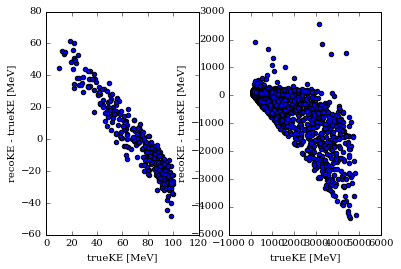

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(arr3_lo_E,clf_lo_E.predict(arr2_lo_E_n)-arr3_lo_E)
ax1.set_xlabel("trueKE [MeV]")
ax1.set_ylabel("recoKE - trueKE [MeV]")
ax2.scatter(arr3_hi_E,clf_hi_E.predict(arr2_hi_E_n)-arr3_hi_E)
ax2.set_xlabel("trueKE [MeV]")
ax2.set_ylabel("recoKE - trueKE [MeV]")

In [8]:
chain = ROOT.TChain('nu_eneNEW')
for i in range(1040,1099):
    chain.Add('/Disk/ds-sopa-group/PPE/titus/ts-WChRecoSandBox/scripts/editing_ene/outputs/nu_numu_'+str(i)+'_CCQE_12in_energy_studies_recoquant_tree_NEWlookups.root')
test_data_lo_E = tree2array(chain, selection='trueKE<'+str(E_threshold))
test_data_hi_E = tree2array(chain, selection='trueKE>'+str(E_threshold))

/cvmfs/sft.cern.ch/lcg/releases/LCG_85swan2/root_numpy/4.5.1/x86_64-slc6-gcc49-opt/lib/python2.7/site-packages/root_numpy-4.5.1-py2.7-linux-x86_64.egg/root_numpy/_tree.py:372: RuntimeWarning: ignoring duplicate branch named 'recoE_lookup'
  cache_size)


In [9]:
test_data_reduced_lo_E = test_data_lo_E[['total_hits2','total_ring_PEs2','recoDWallR2','recoDWallZ2','hits_pot_length2','lambda_max_2']]#,'hits_pot_length2']]
test_data_reduced_lo_E_n = test_data_reduced_lo_E.view(test_data_reduced_lo_E.dtype[0]).reshape(test_data_reduced_lo_E.shape + (-1,))
test_data_trueKE_lo_E = test_data_lo_E['trueKE']
test_data_reduced_hi_E = test_data_hi_E[['total_hits2','total_ring_PEs2','recoDWallR2','recoDWallZ2','hits_pot_length2','lambda_max_2']]#,'hits_pot_length2']]
test_data_reduced_hi_E_n = test_data_reduced_hi_E.view(test_data_reduced_hi_E.dtype[0]).reshape(test_data_reduced_hi_E.shape + (-1,))
test_data_trueKE_hi_E = test_data_hi_E['trueKE']

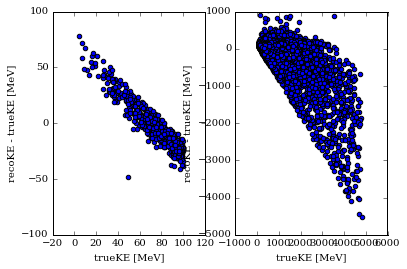

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(test_data_trueKE_lo_E,clf_lo_E.predict(test_data_reduced_lo_E_n)-test_data_trueKE_lo_E)
ax2.scatter(test_data_trueKE_hi_E,clf_hi_E.predict(test_data_reduced_hi_E_n)-test_data_trueKE_hi_E)
ax1.set_ylim((-100,100))
ax1.set_xlabel("trueKE [MeV]")
ax1.set_ylabel("recoKE - trueKE [MeV]")
ax2.set_ylim((-5000,1000))
ax2.set_xlabel("trueKE [MeV]")
ax2.set_ylabel("recoKE - trueKE [MeV]")

In [11]:
res_twod_SGD_lo_E = np.dstack((test_data_trueKE_lo_E, np.abs(clf_lo_E.predict(test_data_reduced_lo_E_n)-test_data_trueKE_lo_E)/test_data_trueKE_lo_E))
res_twod_SGD_hi_E = np.dstack((test_data_trueKE_hi_E, np.abs(clf_hi_E.predict(test_data_reduced_hi_E_n)-test_data_trueKE_hi_E)/test_data_trueKE_hi_E))

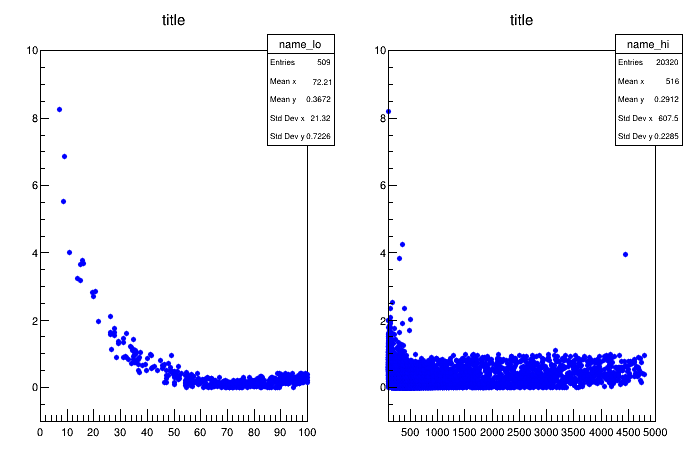

In [12]:
hist_SGD_lo_E = ROOT.TH2D('name_lo', 'title', 100, 0, E_threshold, 100, -1, 10)
fill_hist(hist_SGD_lo_E, res_twod_SGD_lo_E[0])
hist_SGD_hi_E = ROOT.TH2D('name_hi', 'title', 100, E_threshold, 5000, 100, -1, 10)
fill_hist(hist_SGD_hi_E, res_twod_SGD_hi_E[0])
c = ROOT.TCanvas()
c.Divide(2,1)
c.SetLogy(0)
c.cd(1)
hist_SGD_lo_E.Draw()
c.cd(2)
hist_SGD_hi_E.Draw()
c.Draw()

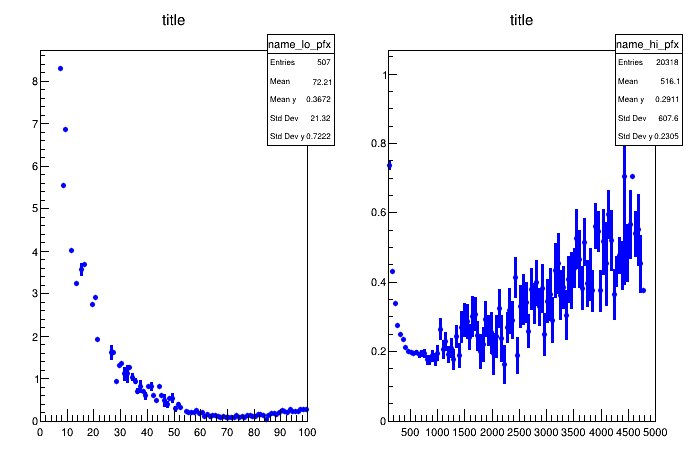

In [13]:
profile_SGD_lo_E = hist_SGD_lo_E.ProfileX()
profile_SGD_lo_E.SetLineColor(ROOT.kBlue)
profile_SGD_hi_E = hist_SGD_hi_E.ProfileX()
profile_SGD_hi_E.SetLineColor(ROOT.kBlue)
c1 = ROOT.TCanvas()
c1.Divide(2,1)
c1.SetLogy(0)
c1.cd(1)
profile_SGD_lo_E.Draw()
c1.cd(2)
profile_SGD_hi_E.Draw()
c1.Draw()
c1.SetLogy(0)
c1.Draw()

In [14]:
params = {'n_estimators': 1000, 'max_depth': 10, 'min_samples_split': 1,
          'learning_rate': 0.01, 'loss': 'lad'}
net_lo_E = ensemble.GradientBoostingRegressor(**params)
net_lo_E.fit(arr2_lo_E_n,arr3_lo_E)
net_lo_E
net_hi_E = ensemble.GradientBoostingRegressor(**params)
net_hi_E.fit(arr2_hi_E_n,arr3_hi_E)
net_hi_E

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01,
             loss='lad', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=1,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

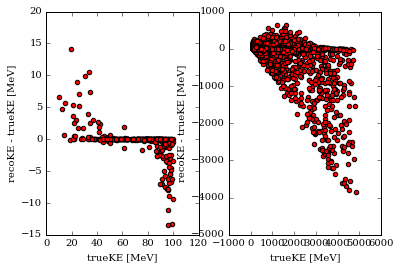

/phys/linux/gcowan1/software/my_env/lib/python2.7/site-packages/sklearn/ensemble/gradient_boosting.py:1122: FutureWarning: Numpy has detected that you (may be) writing to an array returned
by numpy.diagonal or by selecting multiple fields in a structured
array. This code will likely break in a future numpy release --
see numpy.diagonal or arrays.indexing reference docs for details.
The quick fix is to make an explicit copy (e.g., do
arr.diagonal().copy() or arr[['f0','f1']].copy()).
  predict_stages(self.estimators_, X, self.learning_rate, score)


In [15]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(arr3_lo_E,net_lo_E.predict(arr2_lo_E_n)-arr3_lo_E,c='r')
ax2.scatter(arr3_hi_E,net_hi_E.predict(arr2_hi_E_n)-arr3_hi_E,c='r')
ax1.set_xlabel("trueKE [MeV]")
ax1.set_ylabel("recoKE - trueKE [MeV]")
ax2.set_xlabel("trueKE [MeV]")
ax2.set_ylabel("recoKE - trueKE [MeV]")

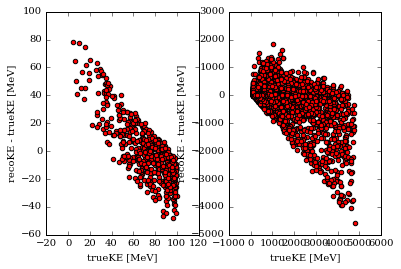

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(test_data_trueKE_lo_E,(net_lo_E.predict(test_data_reduced_lo_E_n)-test_data_trueKE_lo_E), c='r')
ax2.scatter(test_data_trueKE_hi_E,(net_hi_E.predict(test_data_reduced_hi_E_n)-test_data_trueKE_hi_E), c='r')
ax1.set_xlabel("trueKE [MeV]")
ax1.set_ylabel("recoKE - trueKE [MeV]")
ax2.set_xlabel("trueKE [MeV]")
ax2.set_ylabel("recoKE - trueKE [MeV]")
matrix_lo_E = np.dstack((test_data_trueKE_lo_E , (net_lo_E.predict(test_data_reduced_lo_E_n)-test_data_trueKE_lo_E )))
matrix_hi_E = np.dstack((test_data_trueKE_hi_E , (net_hi_E.predict(test_data_reduced_hi_E_n)-test_data_trueKE_hi_E )))

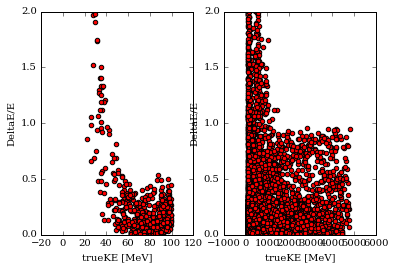

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(test_data_trueKE_lo_E,(np.abs(net_lo_E.predict(test_data_reduced_lo_E_n)-test_data_trueKE_lo_E)/test_data_trueKE_lo_E),c='r')
ax2.scatter(test_data_trueKE_hi_E,(np.abs(net_hi_E.predict(test_data_reduced_hi_E_n)-test_data_trueKE_hi_E)/test_data_trueKE_hi_E),c='r')
ax1.set_xlabel("trueKE [MeV]")
ax1.set_ylabel("DeltaE/E")
ax1.set_ylim(0,2)
ax2.set_xlabel("trueKE [MeV]")
ax2.set_ylabel("DeltaE/E")
ax2.set_ylim(0,2)
twod_GBR_abs_lo_E = np.dstack((test_data_trueKE_lo_E, np.abs(net_lo_E.predict(test_data_reduced_lo_E_n)-test_data_trueKE_lo_E)/test_data_trueKE_lo_E))
twod_GBR_abs_hi_E = np.dstack((test_data_trueKE_hi_E, np.abs(net_hi_E.predict(test_data_reduced_hi_E_n)-test_data_trueKE_hi_E)/test_data_trueKE_hi_E))

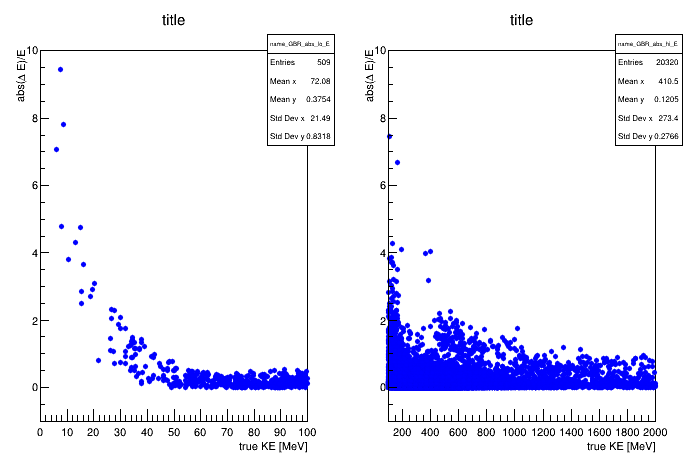

In [18]:
hist_GBR_abs_lo_E = ROOT.TH2D('name_GBR_abs_lo_E', 'title', 50, 0, E_threshold, 100, -1, 10)
hist_GBR_abs_hi_E = ROOT.TH2D('name_GBR_abs_hi_E', 'title', 50, E_threshold, 2000, 100, -1, 10)
fill_hist(hist_GBR_abs_lo_E, twod_GBR_abs_lo_E[0])
fill_hist(hist_GBR_abs_hi_E, twod_GBR_abs_hi_E[0])
canvas = ROOT.TCanvas()
canvas.Divide(2,1)
canvas.cd(1)
hist_GBR_abs_lo_E.Draw()
hist_GBR_abs_lo_E.GetXaxis().SetTitle('true KE [MeV]')
hist_GBR_abs_lo_E.GetYaxis().SetTitle('abs(#Delta E)/E')
canvas.cd(2)
hist_GBR_abs_hi_E.Draw()
hist_GBR_abs_hi_E.GetXaxis().SetTitle('true KE [MeV]')
hist_GBR_abs_hi_E.GetYaxis().SetTitle('abs(#Delta E)/E')
canvas.Draw()

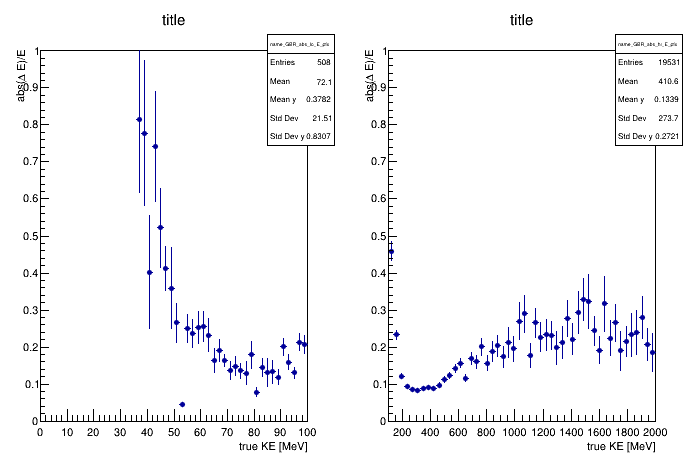

In [19]:
profile_GBR_abs_lo_E = hist_GBR_abs_lo_E.ProfileX()
profile_GBR_abs_lo_E.SetLineColor(ROOT.kBlue+2)
profile_GBR_abs_lo_E.SetMarkerColor(ROOT.kBlue+2)
profile_GBR_abs_lo_E.SetLineWidth(1)
profile_GBR_abs_hi_E = hist_GBR_abs_hi_E.ProfileX()
profile_GBR_abs_hi_E.SetLineColor(ROOT.kBlue+2)
profile_GBR_abs_hi_E.SetMarkerColor(ROOT.kBlue+2)
profile_GBR_abs_hi_E.SetLineWidth(1)
canvas_prof = ROOT.TCanvas()
canvas_prof.Divide(2,1)
canvas_prof.cd(1)
profile_GBR_abs_lo_E.Draw()
profile_GBR_abs_lo_E.SetMinimum(0)
profile_GBR_abs_lo_E.SetMaximum(1)
profile_GBR_abs_lo_E.GetXaxis().SetTitle('true KE [MeV]')
profile_GBR_abs_lo_E.GetYaxis().SetTitle('abs(#Delta E)/E')
canvas_prof.cd(2)
profile_GBR_abs_hi_E.Draw()
profile_GBR_abs_hi_E.SetMinimum(0)
profile_GBR_abs_hi_E.SetMaximum(1)
profile_GBR_abs_hi_E.GetXaxis().SetTitle('true KE [MeV]')
profile_GBR_abs_hi_E.GetYaxis().SetTitle('abs(#Delta E)/E')
canvas_prof.Draw()

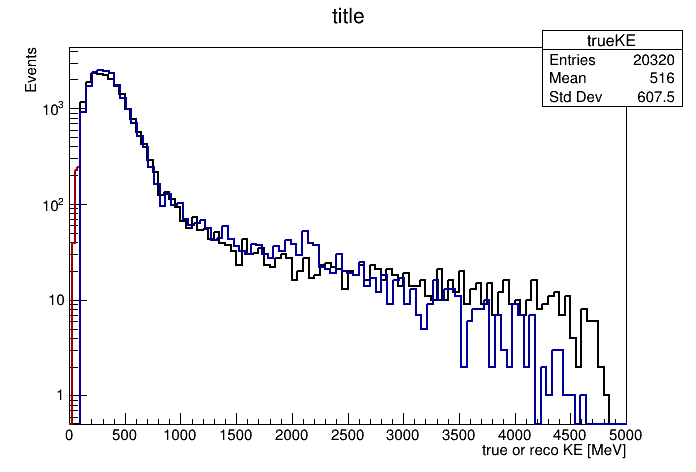

In [20]:
hist_trueKE = ROOT.TH1D('trueKE', 'title', 100, 0, 5000)
hist_recoKE_lo_E = ROOT.TH1D('recoKE', 'title', 4, 0, E_threshold)
hist_recoKE_hi_E = ROOT.TH1D('recoKE_GBR', 'title', 96, E_threshold, 5000)
hist_trueKE.SetLineColor(ROOT.kBlack)
hist_recoKE_lo_E.SetLineColor(ROOT.kRed+2)
hist_recoKE_hi_E.SetLineColor(ROOT.kBlue+2)
hist_trueKE.SetLineWidth(2)
hist_recoKE_lo_E.SetLineWidth(2)
hist_recoKE_hi_E.SetLineWidth(2)
fill_hist(hist_trueKE, test_data_trueKE_hi_E)
fill_hist(hist_recoKE_lo_E, net_lo_E.predict(test_data_reduced_lo_E_n))
fill_hist(hist_recoKE_hi_E, net_hi_E.predict(test_data_reduced_hi_E_n))
c2 = ROOT.TCanvas()
hist_trueKE.Draw()
hist_recoKE_lo_E.Draw("same")
hist_recoKE_hi_E.Draw("same")
hist_trueKE.GetXaxis().SetTitle('true or reco KE [MeV]')
hist_trueKE.GetYaxis().SetTitle('Events')
c2.SetLogy()
c2.Draw()

In [21]:
hist_trueKE_zoom = ROOT.TH1D('trueKE_zoom', 'title', 100, 0, 2000)
hist_recoKE_zoom = ROOT.TH1D('recoKE_zoom', 'title', 100, 0, 2000)
hist_recoKE_GBR_zoom = ROOT.TH1D('recoKE_GBR_zoom', 'title', 100, 0, 2000)
hist_trueKE_zoom.SetLineColor(ROOT.kBlack)
hist_recoKE_zoom.SetLineColor(ROOT.kRed)
hist_recoKE_GBR_zoom.SetLineColor(ROOT.kBlue+2)
hist_trueKE_zoom.SetLineWidth(2)
hist_recoKE_GBR_zoom.SetLineWidth(2)
fill_hist(hist_trueKE_zoom, test_data_trueKE)
fill_hist(hist_recoKE_zoom, clf.predict(test_data_reduced_n))
fill_hist(hist_recoKE_GBR_zoom, net.predict(test_data_reduced_n))
hist_trueKE_zoom.Draw()
#hist_recoKE_zoom.Draw("same")
hist_recoKE_GBR_zoom.Draw("same")
hist_trueKE_zoom.GetXaxis().SetTitle('true or reco KE [MeV]')
hist_trueKE_zoom.GetYaxis().SetTitle('Events')
ROOT.gPad.SetLogy()
ROOT.gPad.Draw()

NameError: name 'test_data_trueKE' is not defined

In [ ]:
net.feature_importances_